1.term reconizetion: food? adj for foods?  
[Automatic Food Categorization from Large Unlabeled Corpora and Its
Impact on Relation Extraction](https://www.aclweb.org/anthology/E14-1071.pdf)  
[Towards the Detection of Reliable Food-Health Relationships](https://www.aclweb.org/anthology/W13-1108.pdf)  
[How do non-tastes taste?
A corpus-based study on Chinese people’s perception of spicy and
numbing food](https://www.aclweb.org/anthology/Y18-2001.pdf)  
[FoodIE: A Rule-based Named-entity Recognition Method for Food
Information Extraction
](https://www.researchgate.net/profile/Tome_Eftimov/publication/331233364_FoodIE_A_Rule-based_Named-entity_Recognition_Method_for_Food_Information_Extraction/links/5c6d8a32a6fdcc404ec17b76/FoodIE-A-Rule-based-Named-entity-Recognition-Method-for-Food-Information-Extraction.pdf)  
[FoodBase corpus: a new resource of annotated food entities](https://www.researchgate.net/publication/337030736_FoodBase_corpus_a_new_resource_of_annotated_food_entities)  
2.Bigram: red wine,etc.(https://www.nltk.org/book/ch01.html)
food phrease??  
[Knowledge Acquisition with Natural Language
Processing in the Food Domain: Potential and Challenges](https://projet.liris.cnrs.fr/cwc/cwc2012/cwc2012_submission_1.pdf)



1.adapt the paper.  
2.github repo,include readme(resourse paper, ...), dataset, share. 
3.write down the step, how to adapt the paper in github.

[Machine Learning Food Datasets Collection](https://hackernoon.com/machine-learning-food-datasets-collection-db21e38ea225)


In [79]:
url=f"https://www.eater.com/reviews/{i}"

In [3]:
from bs4 import BeautifulSoup
import urllib
import requests
import time

In [29]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}
req = requests.get(url=f"https://www.eater.com/reviews/1", headers=headers, timeout=(3,7))

html = req.text
soup = BeautifulSoup(html, features="lxml")

In [31]:
all_href = soup.find_all('a')
links=set()
a=0

while(a<len(all_href)):
    try:
        try:
            name = all_href[a]['data-analytics-link']
        except KeyError:
            pass
        else:
            if 'https://ny.eater.com' in all_href[a]['href']:
                links.add(all_href[a]['href'])
        #print(a,all_href[a])
        a = a + 1
    except KeyError:
        a = a + 1
    else:
        pass
    
links=list(links)


['https://ny.eater.com/2018/11/28/18114350/adda-restaurant-review-long-island-city-nyc',
 'https://ny.eater.com/2019/1/22/18191165/intersect-lexus-danny-meyer-restaurant-review-nyc',
 'https://ny.eater.com/2019/2/12/18218817/spa88-wall-street-russian-sauna-bathhouse-review-nyc',
 'https://ny.eater.com/2019/6/18/18681291/au-cheval-nyc-chicago-sodikoff-restaurant-review',
 'https://ny.eater.com/2019/5/29/18637338/estiatorio-milos-hudson-yards-nyc-restaurant-review',
 'https://ny.eater.com/2019/4/16/18311018/wayan-vongerichten-nyc-restaurant-review',
 'https://ny.eater.com/authors/ryan-sutton',
 'https://ny.eater.com/2019/3/12/18259972/gupshup-nyc-restaurant-review-gramercy',
 'https://ny.eater.com/2019/10/22/20923848/electric-lemon-hudson-yards-stephen-starr-review-nyc-restaurants-equinox-hotel',
 'https://ny.eater.com/2019/10/15/20913008/sushi-noda-noz-review-nyc-restaurant-omakase',
 'https://ny.eater.com/2019/2/27/18240210/hotpot-chinese-review-nyc-zhen-wei-fang-tang-hotpot-bowery-low

In [32]:
req_current_page = requests.get(url=links[9], headers=headers, timeout=(3,7))


html_c = req_current_page.text
soup_c = BeautifulSoup(html_c, features="lxml")

In [33]:
name=[]
content=[]

sent=[]
name.append(soup_c.h1.get_text())

all_p = soup_c.find_all('p')

for m in all_p:
    try:
        m.get_text().isspace()
    except TypeError:
        pass
    else:
        if not m.get_text().isspace():
            sent.append(m.get_text())
content.append(sent[1:-1])


In [49]:
name=[]
content=[]
links_all=[]
requests.adapters.DEFAULT_RETRIES = 5
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0','Connection': 'close'}

for i in range(1,14):
    
    req = requests.get(url=f"https://www.eater.com/reviews/{i}", headers=headers, timeout=5)

    html = req.text
    soup = BeautifulSoup(html, features="lxml")
    
    all_href = soup.find_all('a')
    links=set()
    a=0

    while(a<len(all_href)):
        try:
            try:
                all_href[a]['data-analytics-link']
            except KeyError:
                pass
            else:
                if 'https://ny.eater.com/201' in all_href[a]['href']:
                    links.add(all_href[a]['href'])
            #print(a,all_href[a])
            a = a + 1
        except KeyError:
            a = a + 1
        else:
            pass

    links_all= links_all + list(links)
    time.sleep(5)

In [56]:
for link in links_all:
    try:
        req_current_page = requests.get(url=link, headers=headers, timeout=5)
    except requests.exceptions.ConnectionError:
        print("Connection refused")
    else:        
        html_c = req_current_page.text
        soup_c = BeautifulSoup(html_c, features="lxml")

        sent=[]
        name.append(soup_c.h1.get_text())

        all_p = soup_c.find_all('p')

        for m in all_p:
            try:
                m.get_text().isspace()
            except TypeError:
                pass
            else:
                if not m.get_text().isspace():
                    sent.append(m.get_text())
        content.append(sent[1:-1])
        time.sleep(5)

Connection refused
Connection refused
Connection refused
Connection refused
Connection refused


In [2]:
import numpy as np
a=np.array(content)
np.save('ny.eater-content.npy',a) 
b=np.array(name)
np.save('ny.eater-name.npy',b) 



NameError: name 'content' is not defined

In [1]:
import numpy as np
b=np.load('ny.eater-content.npy')
content=b.tolist()

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords

In [6]:
sents=''
for each in content:
    art=''
    for sent in each:
        art=art+sent
    sents=sents+art

In [7]:
s=sents

f = s.replace("\n", " ") 

data = [] 

stop_words = set(stopwords.words('english')) 
  

  


# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        if j.isalpha():
            if j not in stop_words: 
                temp.append(j.lower()) 

    data.append(temp) 

In [8]:
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5) 

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')
for each in model1.predict_output_word(['spicy'],100):
    if nlp(each[0])[0].pos_ == 'NOUN': #NOUN,VERB
        print (each)

('pork', 0.00024690854)
('padding', 0.00022691576)
('despise', 0.00022247143)
('evoo', 0.00022072936)
('kothu', 0.00022063038)
('usa', 0.0002037813)
('mingala', 0.00020377112)
('mafia', 0.00019946248)
('drink', 0.00019426145)
('capezzana', 0.0001898633)
('chicken', 0.0001850719)
('rears', 0.00018233387)
('checkers', 0.00017869262)
('livestock', 0.00017622442)
('coddling', 0.00017557562)
('punchcaviar', 0.00017494515)
('wine', 0.00017489241)
('ringers', 0.0001747836)
('tax', 0.00017263941)
('sustainability', 0.00017211547)
('cracklings', 0.0001685704)
('brulée', 0.0001660845)
('schedules', 0.00016386775)
('deficiencies', 0.00016347095)
('verdency', 0.00016164228)
('plates', 0.00016117663)
('indians', 0.00016044019)
('markovcha', 0.00016034918)
('duckand', 0.00015930446)
('dimayuga', 0.00015911805)
('demolish', 0.00015793483)
('fates', 0.00015636055)
('mishima', 0.00015611565)
('clumps', 0.00015609834)
('visas', 0.00015568384)
('strogonoff', 0.00015542473)
('esca', 0.00015457717)
('freak

In [75]:
print( model1.wv.most_similar('delicious'))

[('keep', 0.9999181032180786), ('used', 0.9999152421951294), ('rather', 0.9999114274978638), ('enough', 0.9999063014984131), ('they', 0.9999054670333862), ('he', 0.9999032020568848), ('product', 0.9999029040336609), ('classic', 0.9999024868011475), ('perfect', 0.9998944401741028), ('interior', 0.9998928308486938)]


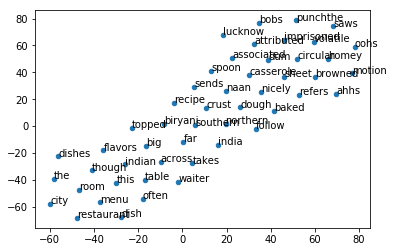

In [76]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model1['delicious'])))

for term in model1.wv.vocab:
    X[count] = model1[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()